# Prueba de Data scientist

In [1]:
import pandas as pd
import random
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import seaborn as sns

In [2]:
# AQUI HACEMOS TODAS LAS FUNCIONES QUE VAMOS A USAR

def generar_ventas_ficticias(num_filas):
    """
    Genera datos ficticios de ventas, con posibilidad de incluir valores nulos.

    Args:
        num_filas (int): El número de filas (ventas) a generar.

    Returns:
        list: Una lista de listas, donde cada lista contiene la fecha, producto, 
        cantidad, y precio unitario. Algunas filas pueden contener valores nulos en 
        la cantidad o el precio unitario.
    """
    data = []
    for i in range(num_filas):
        fecha = random.choice(fechas)
        producto = random.choice(productos)
        cantidad = random.randint(1, 20)
        precio_unitario = round(random.uniform(5, 15), 2)

        if random.random() < 0.1:
            cantidad = None
        if random.random() < 0.1:
            precio_unitario = None

        data.append([fecha, producto, cantidad, precio_unitario])
    return data

def revisar_estructura(df):
    """
    Imprime la estructura del DataFrame, incluyendo dimensiones, tipos de datos 
    y la cantidad de valores nulos por columna.

    Args:
        df (pd.DataFrame): El DataFrame a analizar.
    """
    print("Dimensiones del DataFrame:")
    print(df.shape)
    print("\nTipos de datos:")
    print(df.dtypes)
    print("\nValores nulos:")
    print(df.isnull().sum())
    print("\n")

def resumen_estadistico(df):
    """
    Imprime un resumen estadístico de las variables numéricas y categóricas 
    del DataFrame.

    Args:
        df (pd.DataFrame): El DataFrame a analizar.
    """
    print("Resumen estadístico de las variables numéricas:")
    print(df.describe())
    print("\nResumen de las variables categóricas:")
    print(df.describe(include=['object']))
    print("\n")

def visualizaciones(df):
    """
    Genera varios gráficos sobre las ventas en el DataFrame:
    1. Histograma de la cantidad vendida.
    2. Gráfico de barras de las ventas por producto.
    3. Gráfico de caja (boxplot) del precio unitario.

    Args:
        df (pd.DataFrame): El DataFrame que contiene los datos de las ventas.
    """
    plt.figure(figsize=(10, 5))
    df['cantidad'].hist(bins=15, color='skyblue')
    plt.title('Distribución de la Cantidad Vendida')
    plt.xlabel('Cantidad')
    plt.ylabel('Frecuencia')
    plt.grid(False)
    plt.show()

    plt.figure(figsize=(10, 5))
    ventas_por_producto = df.groupby('producto')['cantidad'].sum().reset_index()
    sns.barplot(x='producto', y='cantidad', data=ventas_por_producto, palette='viridis')
    plt.title('Cantidad Vendida por Producto')
    plt.ylabel('Cantidad')
    plt.show()

    plt.figure(figsize=(10, 5))
    sns.boxplot(df['precio_unitario'])
    plt.title('Distribución del Precio Unitario')
    plt.show()

def analizar_valores_nulos(df):
    """
    Imprime el porcentaje de valores nulos en cada columna del DataFrame.

    Args:
        df (pd.DataFrame): El DataFrame a analizar.
    """
    print("Porcentaje de valores nulos por columna:")
    nulos = df.isnull().mean() * 100
    print(nulos[nulos > 0])
    print("\n")

def graficar_ventas_por_producto(ventas_por_producto):
    """
    Genera un gráfico de barras que muestra el total de ventas por producto.

    Args:
        ventas_por_producto (pd.DataFrame): DataFrame con las columnas 'producto' 
        y 'total_venta' que representa las ventas por producto.
    """
    plt.figure(figsize=(10, 6))
    sns.barplot(x='producto', y='total_venta', data=ventas_por_producto, palette='Blues_d')
    plt.title('Total de Ventas por Producto')
    plt.xlabel('Producto')
    plt.ylabel('Total de Ventas')
    plt.xticks(rotation=45)
    plt.show()

def graficar_producto_mas_vendido(producto_mas_vendido):
    """
    Genera un gráfico de barras para mostrar el producto más vendido.

    Args:
        producto_mas_vendido (pd.Series): Serie que contiene el nombre del producto 
        y el total de ventas del producto más vendido.
    """
    plt.figure(figsize=(5, 4))
    plt.bar(producto_mas_vendido['producto'], producto_mas_vendido['total_venta'], color='green')
    plt.title('Producto Más Vendido')
    plt.xlabel('Producto')
    plt.ylabel('Total de Ventas')
    plt.show()

def graficar_top_5_dias(top_5_dias):
    """
    Genera un gráfico de línea que muestra los 5 días con mayor cantidad de ventas.

    Args:
        top_5_dias (pd.DataFrame): DataFrame con las columnas 'fecha' y 'cantidad' 
        que representa los 5 días con más ventas.
    """
    plt.figure(figsize=(10, 6))
    sns.lineplot(x='fecha', y='cantidad', data=top_5_dias, marker="o", color='red')
    plt.title('Top 5 Días con Mayor Cantidad de Ventas')
    plt.xlabel('Fecha')
    plt.ylabel('Cantidad de Productos Vendidos')
    plt.xticks(rotation=45)
    plt.show()

In [3]:
# Lista de productos que se utilizarán para generar los datos ficticios
productos = ['Producto A', 'Producto B', 'Producto C', 'Producto D', 'Producto E']

# Generar una lista de fechas con un rango de 30 días, comenzando el 1 de enero de 2024
fechas = pd.date_range(start="2024-01-01", periods=30).tolist()

# Llamar a la función generar_ventas_ficticias para generar 200 filas de datos ficticios
# Esta función crea una lista con información aleatoria sobre productos, fechas, cantidad, y precio unitario
data_ficticia = generar_ventas_ficticias(200)

# Convertir la lista generada en un DataFrame de pandas, especificando los nombres de las columnas
df = pd.DataFrame(data_ficticia, columns=["fecha", "producto", "cantidad", "precio_unitario"])


In [4]:
df

,fecha,producto,cantidad,precio_unitario
0,2024-01-12,Producto B,9.0,13.87
1,2024-01-30,Producto A,14.0,8.12
2,2024-01-03,Producto B,7.0,5.89
3,2024-01-21,Producto E,17.0,8.10
4,2024-01-10,Producto C,1.0,14.83
...,...,...,...,...
195,2024-01-19,Producto B,14.0,8.95
196,2024-01-18,Producto D,NaN,6.69
197,2024-01-10,Producto C,13.0,5.57
198,2024-01-16,Producto E,1.0,5.24


In [5]:
df.shape

(200, 4)

In [6]:
df.to_csv("df.csv", index=False)

## ACTIVIDADES POR REALIZAR

### 1)	Cargar el archivo CSV en un data frame utilizando pandas

In [8]:
df = pd.read_csv('df.csv')

In [9]:
df.head()

,fecha,producto,cantidad,precio_unitario
0,2024-01-12,Producto B,9.0,13.87
1,2024-01-30,Producto A,14.0,8.12
2,2024-01-03,Producto B,7.0,5.89
3,2024-01-21,Producto E,17.0,8.10
4,2024-01-10,Producto C,1.0,14.83


### 2)	Limpiar los datos, ten en cuenta que Gohan para muy ocupado y algunos valores pueden estar vacíos o nulos

In [10]:
# 1 Aqui revisamos su estructura general de 'df'
revisar_estructura(df)

Dimensiones del DataFrame:
(200, 4)

Tipos de datos:
fecha               object
producto            object
cantidad           float64
precio_unitario    float64
dtype: object

Valores nulos:
fecha               0
producto            0
cantidad           21
precio_unitario    22
dtype: int64




In [11]:
# 2 Aqui un resumen estadistico general de 'df'
resumen_estadistico(df)

Resumen estadístico de las variables numéricas:
         cantidad  precio_unitario
count  179.000000       178.000000
mean    10.849162        10.477584
std      5.738167         2.980203
min      1.000000         5.000000
25%      6.000000         8.125000
50%     11.000000        10.185000
75%     16.000000        13.485000
max     20.000000        14.980000

Resumen de las variables categóricas:
             fecha    producto
count          200         200
unique          30           5
top     2024-01-08  Producto E
freq            11          46




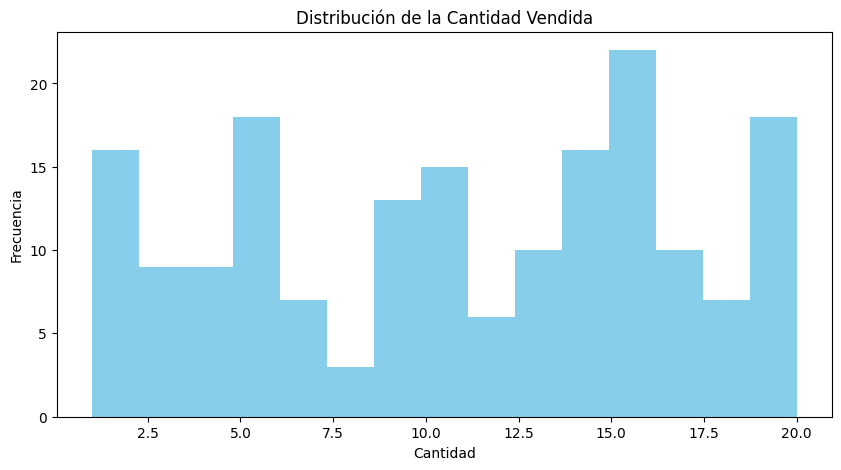

/var/folders/6m/b7wm2zkj55lg25xsx3d3sx6h0000gn/T/ipykernel_67224/1279814428.py:80: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='producto', y='cantidad', data=ventas_por_producto, palette='viridis')


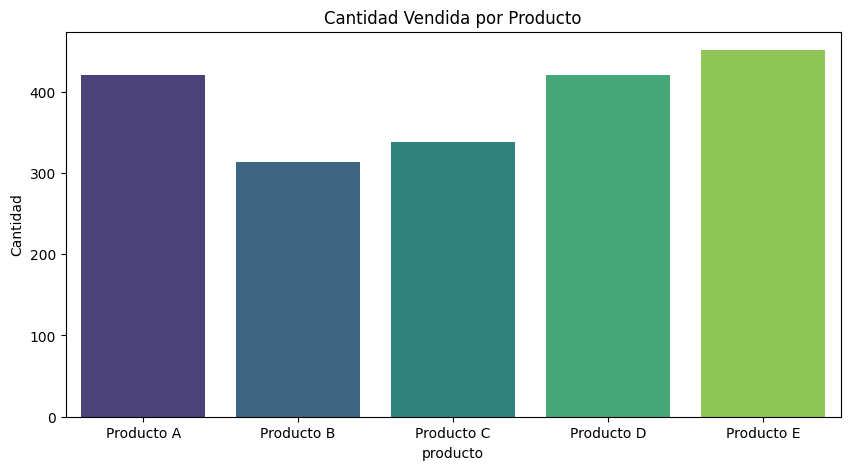

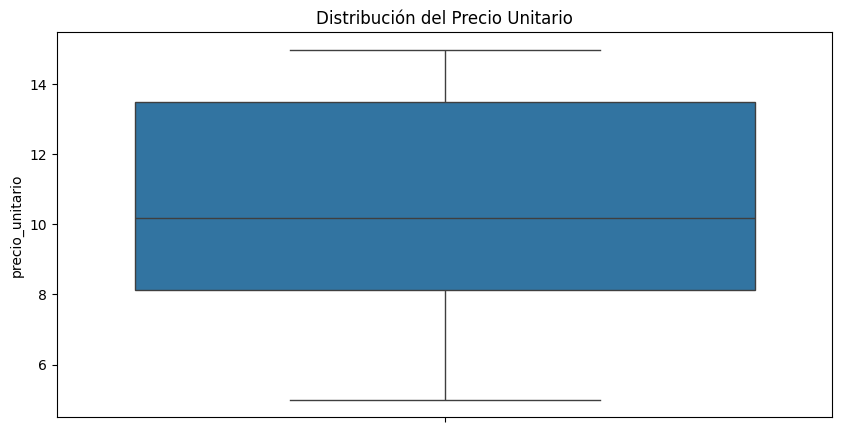

In [12]:
# 3 Aqui veremos 3 graficos de vision general para el entendimiento de la data
visualizaciones(df)

In [13]:
# 3 Aqui vanalizaremos los nulos que hay en el 'df'
analizar_valores_nulos(df)

Porcentaje de valores nulos por columna:
cantidad           10.5
precio_unitario    11.0
dtype: float64




In [14]:
df1 = df.dropna()

In [15]:
df.shape, df1.shape

((200, 4), (162, 4))

## 3) Realizar los calculos necesarios para saber:

### 3.1)	El total de ventas por cada producto

In [16]:
# 1) El total de ventas por cada producto
df1['total_venta'] = df1['cantidad'] * df1['precio_unitario']
ventas_por_producto = df1.groupby('producto')['total_venta'].sum().reset_index()  # Reiniciar el índice
ventas_por_producto = ventas_por_producto.sort_values(by='total_venta', ascending=False).reset_index(drop=True)  # Asegurarse de reiniciar el índice


/var/folders/6m/b7wm2zkj55lg25xsx3d3sx6h0000gn/T/ipykernel_67224/3135469970.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['total_venta'] = df1['cantidad'] * df1['precio_unitario']


In [17]:
print("Total de ventas por producto:")
ventas_por_producto

Total de ventas por producto:


,producto,total_venta
0,Producto E,4411.41
1,Producto A,4116.85
2,Producto D,3853.59
3,Producto B,3308.13
4,Producto C,3102.71


/var/folders/6m/b7wm2zkj55lg25xsx3d3sx6h0000gn/T/ipykernel_67224/1279814428.py:111: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='producto', y='total_venta', data=ventas_por_producto, palette='Blues_d')


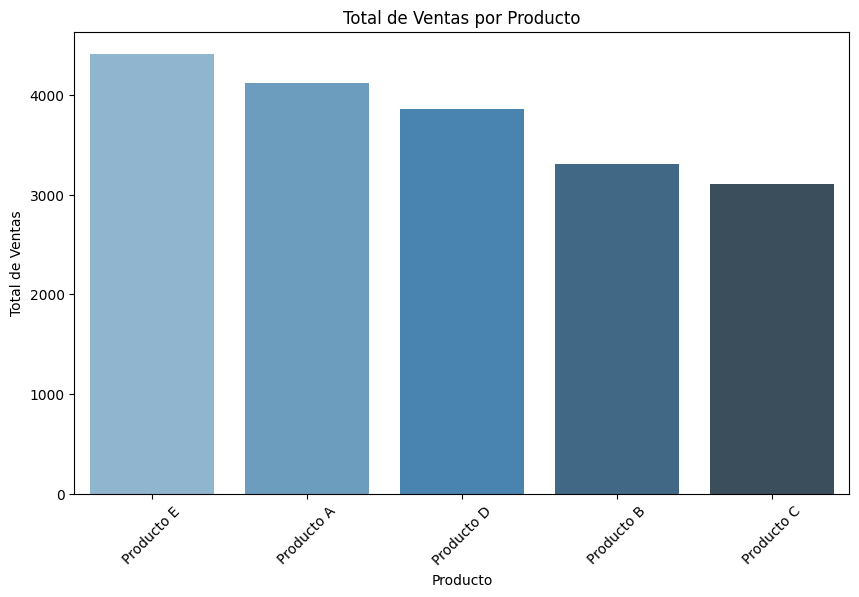

In [18]:
graficar_ventas_por_producto(ventas_por_producto)


### 3.2)	El producto más vendido según el valor de venta (precio unitario x cantidad)

In [19]:
producto_mas_vendido = ventas_por_producto.iloc[0]

In [20]:
print("\nProducto más vendido:")
producto_mas_vendido


Producto más vendido:


producto       Producto E
total_venta       4411.41
Name: 0, dtype: object

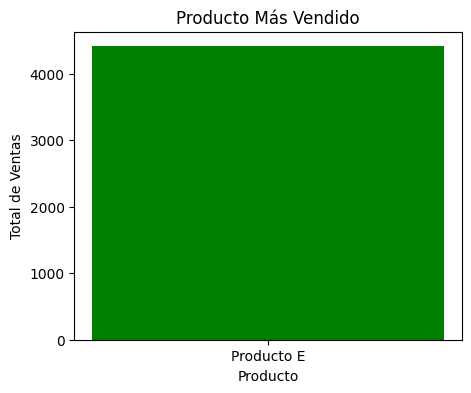

In [21]:
graficar_producto_mas_vendido(producto_mas_vendido)

### 3.3)	Los 5 días con mayor cantidad de ventas en funcion a la cantidad de productos vendidos

In [22]:
ventas_por_dia = df.groupby('fecha')['cantidad'].sum().reset_index()
top_5_dias = ventas_por_dia.nlargest(5, 'cantidad')

In [23]:
print("\nTop 5 días con mayor cantidad de ventas:")
top_5_dias


Top 5 días con mayor cantidad de ventas:


,fecha,cantidad
7,2024-01-08,122.0
18,2024-01-19,120.0
19,2024-01-20,106.0
27,2024-01-28,94.0
29,2024-01-30,90.0


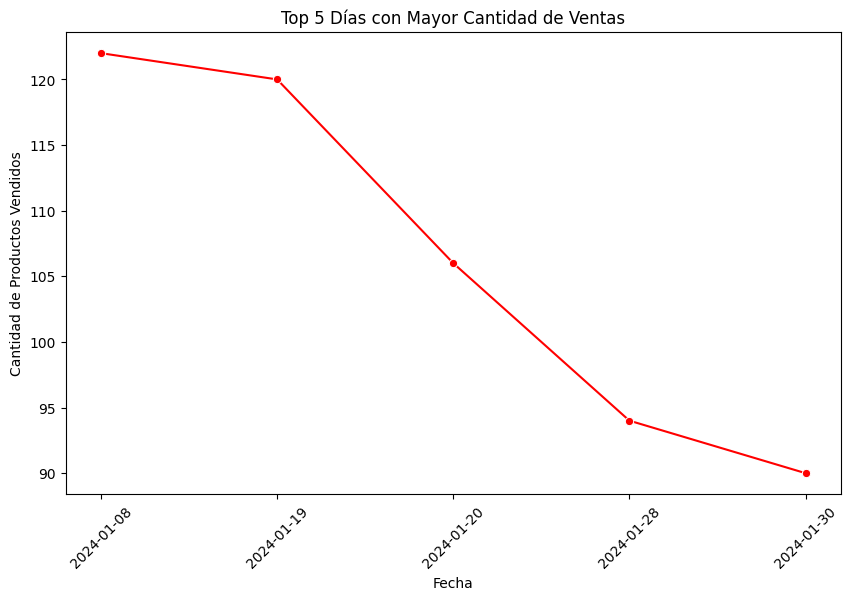

In [24]:
graficar_top_5_dias(top_5_dias)

###  4)	Realizar los siguientes gráficos:

#### 1)	Gráfico de Barras donde se vea las ventas por producto

/var/folders/6m/b7wm2zkj55lg25xsx3d3sx6h0000gn/T/ipykernel_67224/3056241199.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='producto', y='total_venta', data=ventas_por_producto, palette='Blues_d')


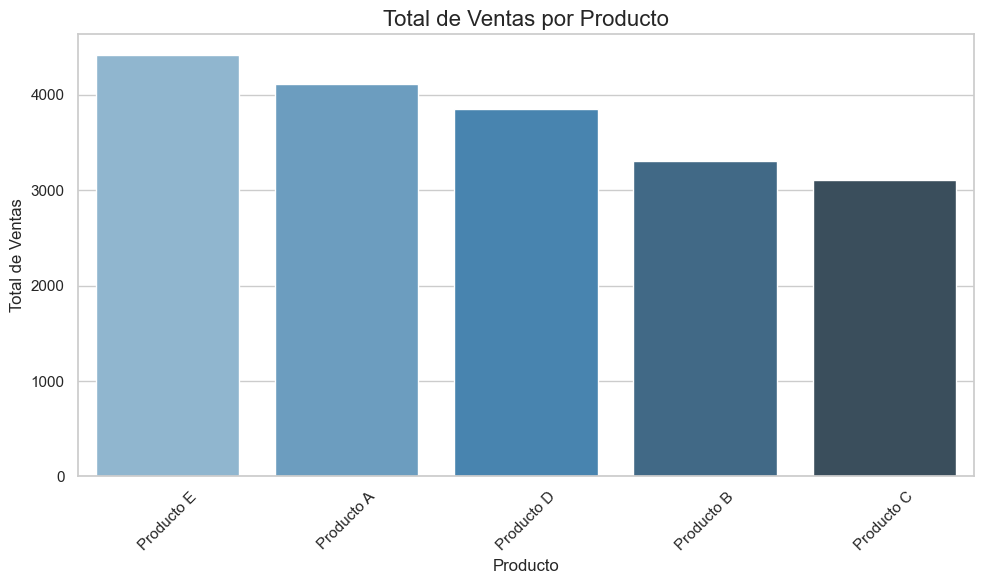

In [25]:
# Configuración general de estilo
sns.set(style="whitegrid")

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))  # Ajustar el tamaño del gráfico
sns.barplot(x='producto', y='total_venta', data=ventas_por_producto, palette='Blues_d')

# Títulos y etiquetas
plt.title('Total de Ventas por Producto', fontsize=16)
plt.xlabel('Producto', fontsize=12)
plt.ylabel('Total de Ventas', fontsize=12)
plt.xticks(rotation=45)  # Rotar las etiquetas del eje X para que se lean mejor
plt.tight_layout()  # Ajusta el diseño del gráfico para que no se corten las etiquetas

# Mostrar el gráfico
plt.show()